In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("zomato_restaurants_in_India.csv")

In [3]:
df.shape

(211944, 26)

In [4]:
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [6]:
df.size

5510544

In [7]:
df.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [8]:
df.describe(include='object')

,name,establishment,url,address,city,locality,zipcode,locality_verbose,cuisines,timings,currency,highlights,rating_text
count,211944,211944,211944,211810,211944,211944,48757,211944,210553,208070,211944,211944,211944
unique,41100,27,55568,50657,99,3731,1311,3910,9382,7740,1,31455,39
top,Domino's Pizza,['Quick Bites'],https://www.zomato.com/chennai/3bs-buddies-bar...,"Laxman Jhula, Tapovan, Rishikesh",Chennai,Civil Lines,0,"Ana Sagar Lake, Ajmer",North Indian,11 AM to 11 PM,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Very Good
freq,3108,64390,169,299,11630,3660,7100,1760,15996,26605,211944,3352,65451


In [9]:
#Total Number of entries
len(df)

211944

### Data Cleaning and Preparation:

#### ● Identify and handle missing values

In [10]:
#Missing Values in each column
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [11]:
#Duplicate Rows in dataset
df.duplicated().sum()

151527

In [12]:
df.isnull()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
211940,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
211941,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
211942,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Percentage of missing values in each column
values_list = list()
cols_list = list()
for col in df.columns:
    missing_percentage = np.mean(df[col].isnull())*100
    cols_list.append(col)
    values_list.append(missing_percentage)
pct_missing_df = pd.DataFrame()
pct_missing_df['column'] = cols_list
pct_missing_df['missing_percentage'] = values_list

In [14]:
pct_missing_df

,column,missing_percentage
0,res_id,0.000000
1,name,0.000000
2,establishment,0.000000
3,url,0.000000
4,address,0.063224
5,city,0.000000
6,city_id,0.000000
7,locality,0.000000
8,latitude,0.000000
9,longitude,0.000000


<AxesSubplot:>

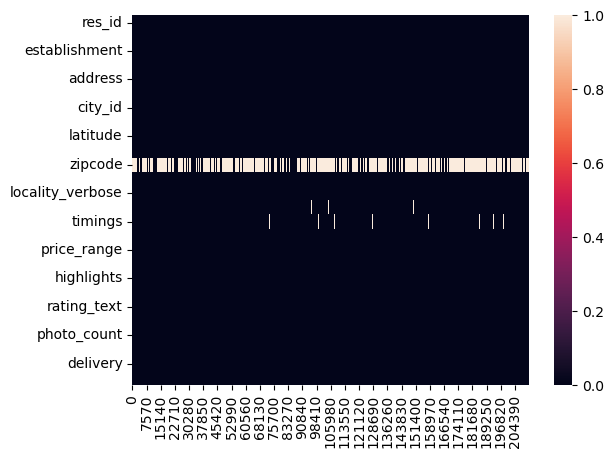

In [15]:
sns.heatmap(df.isna().transpose())

In [16]:
print("Percentage of missing values in columns: ")
for column in df.columns:
    percentage_missing = np.mean(df[column].isna())
    print(f'{column} : {round(percentage_missing*100)}%')

Percentage of missing values in columns: 
res_id : 0%
name : 0%
establishment : 0%
url : 0%
address : 0%
city : 0%
city_id : 0%
locality : 0%
latitude : 0%
longitude : 0%
zipcode : 77%
country_id : 0%
locality_verbose : 0%
cuisines : 1%
timings : 2%
average_cost_for_two : 0%
price_range : 0%
currency : 0%
highlights : 0%
aggregate_rating : 0%
rating_text : 0%
votes : 0%
photo_count : 0%
opentable_support : 0%
delivery : 0%
takeaway : 0%


In [17]:
#Handle Missing Values
#Drop 'zipcode' column as it contains 77% missing values
df1 = df.drop(['zipcode'], axis=1)
df1

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [18]:
df1.shape

(211944, 25)

In [19]:
df1.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'country_id', 'locality_verbose',
       'cuisines', 'timings', 'average_cost_for_two', 'price_range',
       'currency', 'highlights', 'aggregate_rating', 'rating_text', 'votes',
       'photo_count', 'opentable_support', 'delivery', 'takeaway'],
      dtype='object')

In [20]:
for columns in df1:
    df1[columns] = df1[columns].fillna(df1[columns].mode()[0])
    
print(df1.isna().sum())

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64


In [21]:
df1.describe(include='object')

,name,establishment,url,address,city,locality,locality_verbose,cuisines,timings,currency,highlights,rating_text
count,211944,211944,211944,211944,211944,211944,211944,211944,211944,211944,211944,211944
unique,41100,27,55568,50657,99,3731,3910,9382,7740,1,31455,39
top,Domino's Pizza,['Quick Bites'],https://www.zomato.com/chennai/3bs-buddies-bar...,"Laxman Jhula, Tapovan, Rishikesh",Chennai,Civil Lines,"Ana Sagar Lake, Ajmer",North Indian,11 AM to 11 PM,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Very Good
freq,3108,64390,169,433,11630,3660,1760,17387,30479,211944,3352,65451


##### ● Detect and correct any inconsistencies in the dataset (e.g., data types, mislabeled categories).

In [22]:
#Duplicate Rows in dataset
df1.duplicated().sum()

151533

In [23]:
df1.drop_duplicates(subset= None, keep='first', inplace=True)
df1.shape

(60411, 25)

In [24]:
#Replace inconsistent values
df1['establishment'].replace(to_replace = "[]", value = df1['establishment'].mode()[0], inplace=True) 

In [25]:
df1['establishment'].value_counts()

['Quick Bites']        17393
['Casual Dining']      13761
['Café']                4644
['Dessert Parlour']     3915
['Bakery']              3887
['Sweet Shop']          2712
['Beverage Shop']       2566
['Fine Dining']         1656
['Food Court']          1569
['Bar']                 1550
['Dhaba']               1334
['Kiosk']               1196
['Lounge']               898
['Food Truck']           874
['Bhojanalya']           654
['Mess']                 397
['Pub']                  393
['Paan Shop']            326
['Confectionery']        227
['Butcher Shop']         154
['Microbrewery']         136
['Club']                 113
['Shack']                 21
['Cocktail Bar']          17
['Irani Cafe']            14
['Pop up']                 4
Name: establishment, dtype: int64

In [26]:
df1.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,6.041100e+04,60411.000000,60411.000000,60411.000000,60411.0,60411.00000,60411.000000,60411.000000,60411.000000,60411.000000,60411.0,60411.000000,60411.0
mean,1.309279e+07,3417.519376,21.349912,76.587636,1.0,538.31246,1.730844,3.032863,261.587062,194.262303,0.0,-0.371737,-1.0
std,8.133021e+06,5179.013230,41.190015,10.600963,0.0,593.86415,0.880470,1.440739,728.316928,705.715642,0.0,0.925274,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.00000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.000479e+06,7.000000,16.323783,74.653081,1.0,200.00000,1.000000,2.900000,7.000000,1.000000,0.0,-1.000000,-1.0
50%,1.869150e+07,26.000000,22.320915,77.134838,1.0,400.00000,1.000000,3.500000,42.000000,11.000000,0.0,-1.000000,-1.0
75%,1.886668e+07,11295.000000,26.744393,79.928133,1.0,600.00000,2.000000,4.000000,207.000000,82.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.00000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [27]:
df1.describe(include='object')

,name,establishment,url,address,city,locality,locality_verbose,cuisines,timings,currency,highlights,rating_text
count,60411,60411,60411,60411,60411,60411,60411,60411,60411,60411,60411,60411
unique,41100,26,55568,50657,99,3731,3910,9382,7740,1,31455,39
top,Domino's Pizza,['Quick Bites'],https://www.zomato.com/mumbai/candy-and-green-...,"Laxman Jhula, Tapovan, Rishikesh",Chennai,Civil Lines,"Gomti Nagar, Lucknow",North Indian,11 AM to 11 PM,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",Good
freq,406,17393,9,55,2612,804,315,5057,8748,60411,925,17569


##### ● Feature engineering (if necessary), like extracting useful information from existing data.

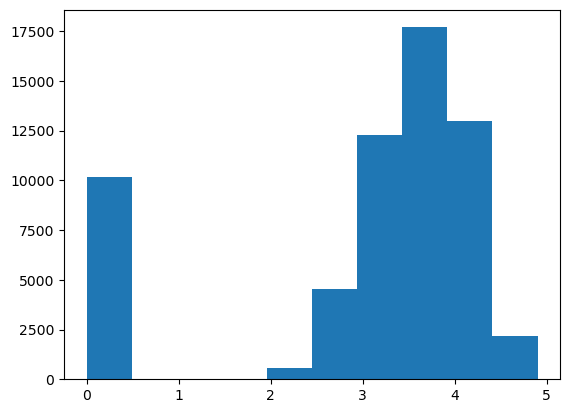

In [28]:
#Restaurants Ratings
plt.hist(df1['aggregate_rating'])
plt.show() 

In [29]:
#Top 5 cities
cities= df1['city'].value_counts()
cities.head(5)

Chennai      2612
Mumbai       2538
Bangalore    2365
Pune         1911
New Delhi    1847
Name: city, dtype: int64

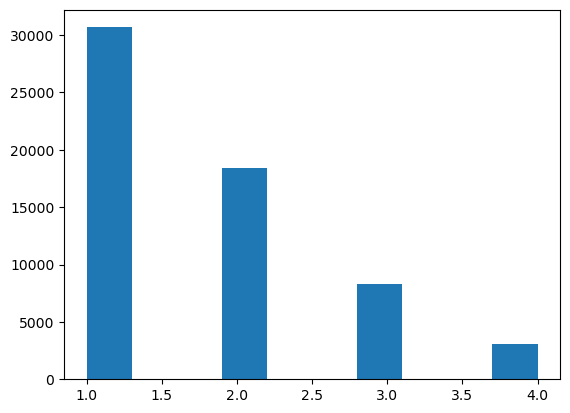

In [30]:
plt.hist(df1['price_range'])
plt.show() 